In [ ]:
##Import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Let's read the data file
iris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Iris Data Set/Iris.csv")

In [ ]:
#Checking for the features and understand the type of data we have to deal with
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Find if any missing values in our data set
# No missing values
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Check the shape of our data set
iris.shape

(150, 6)

In [ ]:
#Again checking the data from the bottom
iris.tail(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,131,7.4,2.8,6.1,1.9,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
133,134,6.3,2.8,5.1,1.5,Iris-virginica
134,135,6.1,2.6,5.6,1.4,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
137,138,6.4,3.1,5.5,1.8,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica


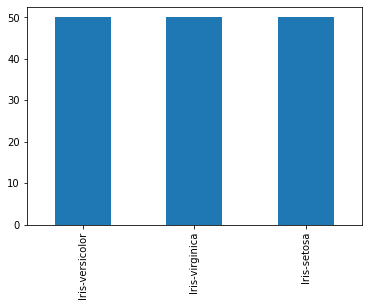

In [ ]:
#counting the no. of categories we have to look out for
#Visualizing by plot
iris['Species'].value_counts().plot(kind='bar')

In [ ]:
#counting the no. of categories we have to look out for
#Visualizing by figures
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
# Remove the identity column as it has no significance but just a serial no.
df = iris.drop("Id", axis=1)

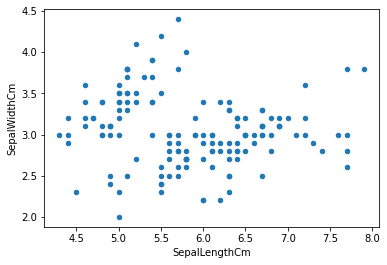

In [ ]:
#observing in a plane 2d scatter plot
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


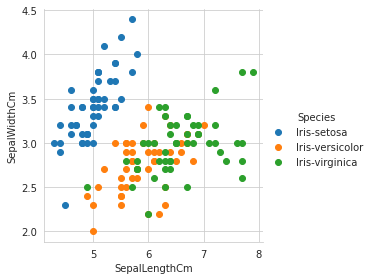

In [ ]:
#Let's observe in a more clear manner by plotting species wise

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "Species", size = 4).map(plt.scatter,'SepalLengthCm','SepalWidthCm' ).add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


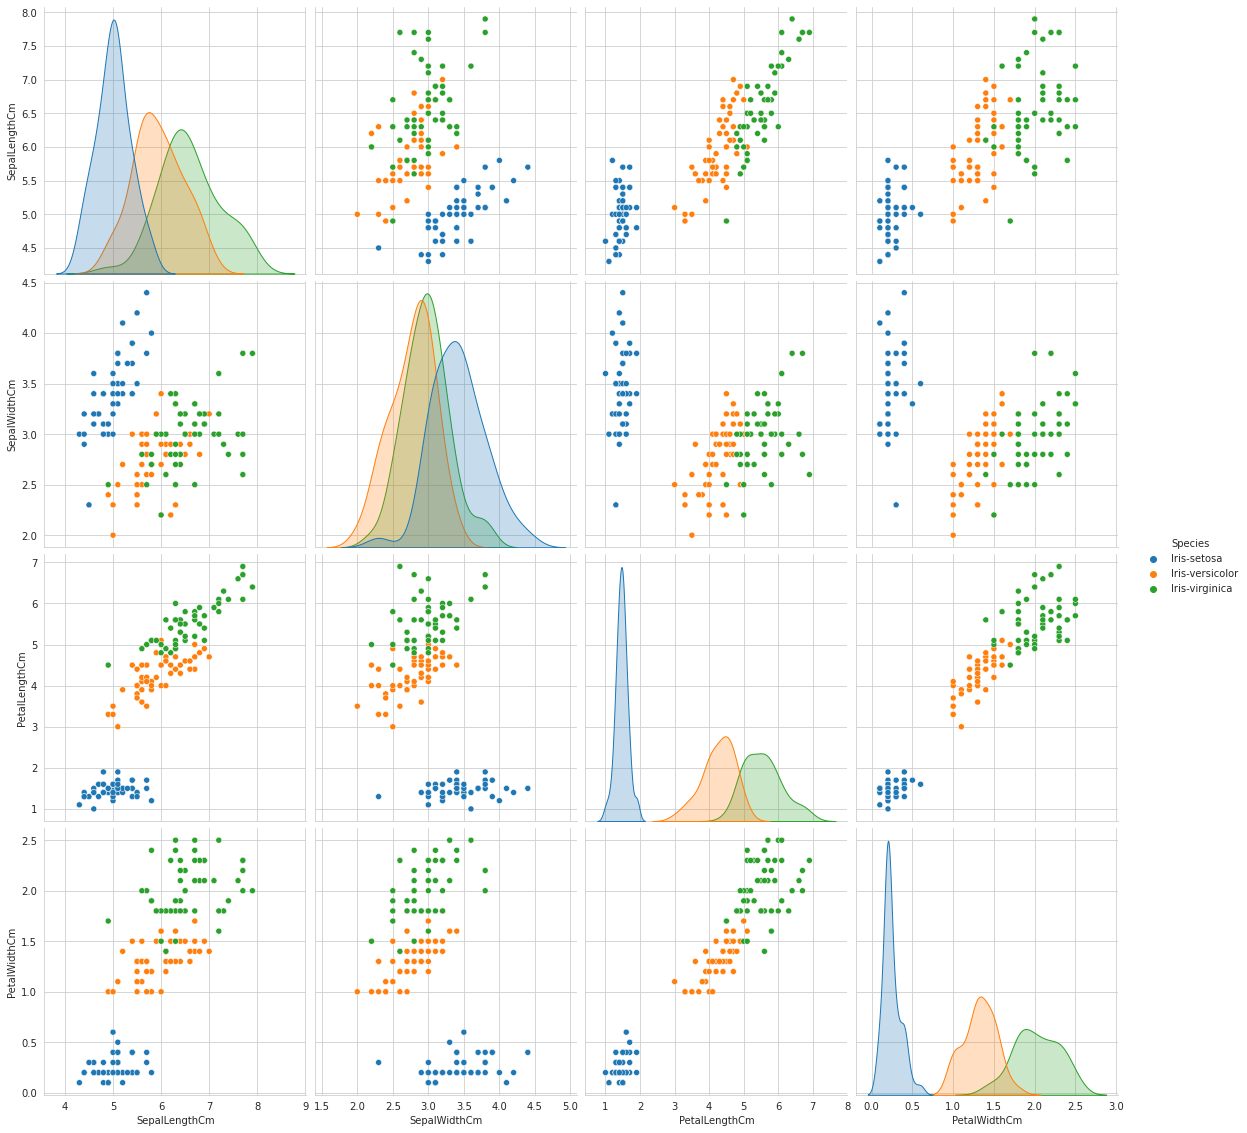

In [ ]:
#Trying to plot every relationship in the dataset with the help of pairplot
sns.set_style("whitegrid")
sns.pairplot(df, hue = 'Species', size = 4)

In [ ]:
# import preprocessing module
from sklearn import preprocessing

# scale the data for better results
df_x = df.drop(["Species"], axis = 1)
df_xscaled = preprocessing.scale(df_x)
df_xscaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
type(df_xscaled)

numpy.ndarray

In [ ]:
# Try clustering first with k-means 
#create a k-means object with 3 clusters
from sklearn.cluster import KMeans
kmeans_scaled = KMeans(3)
# fit the data
kmeans_scaled.fit(df_xscaled)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# predict the cluster for each observation
clusters_scaled = kmeans_scaled.fit_predict(df_xscaled)


In [ ]:
clusters_scaled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
#converting to data frame object
y_predict = pd.DataFrame(clusters_scaled)
y_predict

,0
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,0
147,2
148,2


In [ ]:
y_true = iris["Species"]
y_actual = y_true.map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2})

In [ ]:
y_predict.value_counts()

0    53
1    50
2    47
dtype: int64

In [ ]:
print(sm.classification_report(y_actual,y_predict, target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-vergicolor       0.00      0.00      0.00        50
 Iris-virginica       0.77      0.72      0.74        50

       accuracy                           0.24       150
      macro avg       0.26      0.24      0.25       150
   weighted avg       0.26      0.24      0.25       150



In [ ]:
# The scores are not good and we will apply classification methods which would give better results
# After applying most of the classification algorithms we can observe that the best results are obtained by LDA and Clustering gave 
# the poorest of accuracy. However, it is not not a good idea to evaluate clutering with the accuracy score.

In [ ]:
# Starting afresh
# Classification is not effected by the magnitude of features so we need not to standardize and we can use raw values

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_new = iris.drop('Id', axis = 1)

In [ ]:
iris_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Defning dependent and independent features
x_feature = iris_new.iloc[:, :4]
y_target = iris.iloc[:,-1]

In [ ]:
# We should split the data for training and testing purpose.
# Other approach for it would be to use k-fold cross validation whihc I will apply in mu later commit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_feature,y_target, test_size=0.2)

In [ ]:
# Check how the decision tree performs
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))

0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
# Check how the random forest performs
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))

0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:

# Check how the ensemble model performs
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))



0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
# Check how the ensemble model performs
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))




0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
# Check how the ensemble model performs
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))



0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
# Check how the ensemble model performs
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))

0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
# Now let us apply logistic regression with multiclass variable
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))

0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
# Check how the KNN performs
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))

0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.90      0.90      0.90        10
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
# Check how the LDA performs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))

0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Check how the Gaussian Naive Bayes performs

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))


0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.75      0.86         8

       accuracy                           0.93        30
      macro avg       0.94      0.92      0.92        30
   weighted avg       0.94      0.93      0.93        30



In [ ]:
# Let's check how the support vector classifier performs
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
print(sm.classification_report(y_test,predictions,target_names=['Iris-setosa', 'Iris-vergicolor','Iris-virginica']))


0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-vergicolor       0.82      0.90      0.86        10
 Iris-virginica       0.86      0.75      0.80         8

       accuracy                           0.90        30
      macro avg       0.89      0.88      0.89        30
   weighted avg       0.90      0.90      0.90        30

